<a href="https://colab.research.google.com/github/abnerlugo1/Power-query/blob/main/betha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Graficar
import seaborn as sns
sns.scatterplot(data=df, x='NOCount', y='antiguedad', hue='abner');

NameError: name 'df' is not defined

In [ ]:
# leer dataset
import pandas as pd

df = pd.read_csv('analisis_python.csv', encoding='latin1')
df['antiguedad'] =df['antiguedad']/30


In [ ]:
# Conteo categorías
df['abner'].value_counts()

,count
abner,
experto,30956
nuevo,6198


In [ ]:
# Conteo categorías
df['antiguedad'].value_counts()

,count
antiguedad,
0.100000,3104
0.166667,2657
0.133333,1880
0.633333,1671
1.133333,1620
...,...
4.466667,7
1.400000,6
1.800000,2


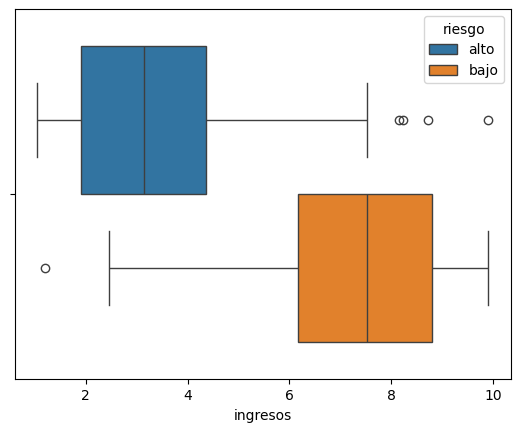

In [ ]:
sns.boxplot(data=df, x='ingresos', hue='riesgo');

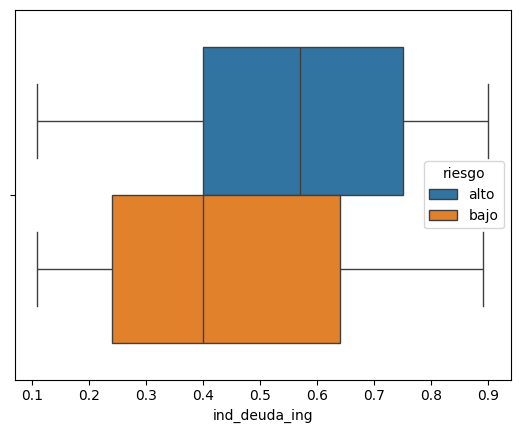

In [ ]:
sns.boxplot(data=df, x='ind_deuda_ing', hue='riesgo');

In [ ]:
# Arreglos X (entradas), y (variable a predecir)
X = df[['ingresos', 'ind_deuda_ing']].to_numpy() # 400x2
y = df['riesgo'].to_numpy() # 400

print(X.shape)
print(y.shape)

(400, 2)
(400,)


In [ ]:
# Crear particiones entrenamiento/prueba
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_tr.shape, y_tr.shape)
print(X_ts.shape, y_ts.shape)

(320, 2) (320,)
(80, 2) (80,)


## 4. Creación y entrenamiento del modelo con Scikit-Learn

In [ ]:
# Crear y entrenar modelo
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression() # Instancia
modelo.fit(X_tr, y_tr)

LogisticRegression()

## 5. Características del modelo entrenado

In [ ]:
print("b (bias):", modelo.intercept_)
print("Parámetros (ws):", modelo.coef_)

b (bias): [-4.31005995]
Parámetros (ws): [[ 1.05999123 -2.62375687]]


$z = 1.05 \cdot \text{ingresos} + -2.62 \cdot \text{ind_deuda_ing} -4.31$

Veamos por ejemplo las probabilidades predichas por el modelo:

In [ ]:
print(modelo.classes_)
modelo.predict_proba(X_ts)

['alto' 'bajo']


array([[0.96827845, 0.03172155],
       [0.0365217 , 0.9634783 ],
       [0.00482081, 0.99517919],
       [0.1617588 , 0.8382412 ],
       [0.19047175, 0.80952825],
       [0.85540455, 0.14459545],
       [0.8160411 , 0.1839589 ],
       [0.05349922, 0.94650078],
       [0.06856468, 0.93143532],
       [0.03157665, 0.96842335],
       [0.04495756, 0.95504244],
       [0.12250003, 0.87749997],
       [0.93647498, 0.06352502],
       [0.97175418, 0.02824582],
       [0.9886448 , 0.0113552 ],
       [0.98149388, 0.01850612],
       [0.24228919, 0.75771081],
       [0.01677064, 0.98322936],
       [0.64802953, 0.35197047],
       [0.09656833, 0.90343167],
       [0.98123288, 0.01876712],
       [0.93749772, 0.06250228],
       [0.6927575 , 0.3072425 ],
       [0.08900971, 0.91099029],
       [0.53747323, 0.46252677],
       [0.06218318, 0.93781682],
       [0.08131929, 0.91868071],
       [0.8773521 , 0.1226479 ],
       [0.96881869, 0.03118131],
       [0.02401854, 0.97598146],
       [0.

Si queremos predecir las categorías usamos el método "predict":

In [ ]:
modelo.predict(X_ts)

array(['alto', 'bajo', 'bajo', 'bajo', 'bajo', 'alto', 'alto', 'bajo',
       'bajo', 'bajo', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'alto',
       'bajo', 'bajo', 'alto', 'bajo', 'alto', 'alto', 'alto', 'bajo',
       'alto', 'bajo', 'bajo', 'alto', 'alto', 'bajo', 'bajo', 'bajo',
       'bajo', 'alto', 'bajo', 'bajo', 'bajo', 'alto', 'alto', 'alto',
       'bajo', 'bajo', 'bajo', 'bajo', 'alto', 'bajo', 'alto', 'alto',
       'alto', 'alto', 'alto', 'bajo', 'bajo', 'bajo', 'alto', 'bajo',
       'alto', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'bajo', 'alto',
       'bajo', 'alto', 'bajo', 'alto', 'alto', 'bajo', 'alto', 'bajo',
       'alto', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'bajo', 'bajo'],
      dtype=object)

## 6. La frontera de decisión

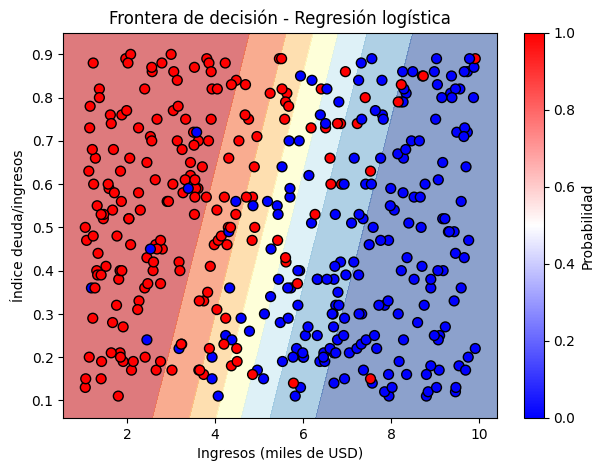

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Crear grilla de valores
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5 # "ingresos"
y_min, y_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05 # "ind_deuda_ing"
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                     np.linspace(y_min, y_max, 1000))

# Predecir probabilidades con "predict_proba"
Z = modelo.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape) # Probabilidades

# Dibujar el set de datos y la frontera de decisión
y_num = df["riesgo"].map({"alto": 1, "bajo": 0}).values
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, cmap="RdYlBu", alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y_num, cmap="bwr", edgecolor="k", s=50)
plt.colorbar(label="Probabilidad")
plt.xlabel("Ingresos (miles de USD)")
plt.ylabel("Índice deuda/ingresos")
plt.title("Frontera de decisión - Regresión logística");

## 7. Desempeño del modelo

Usaremos la exactitud para medir este desempeño:

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_tr = modelo.predict(X_tr)
y_pred_ts = modelo.predict(X_ts)
print("Exactitud entrenamiento:", accuracy_score(y_tr, y_pred_tr))
print("Exactitud prueba:", accuracy_score(y_ts, y_pred_ts))

Exactitud entrenamiento: 0.884375
Exactitud prueba: 0.875


In [ ]:
# leer dataset
import pandas as pd

df = pd.read_csv('analisis_python.csv')
df

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 277: invalid start byte